#  "Strategic Analysis and Predictive Modeling: Enabling a Chinese Automaker's Success in the US Market"

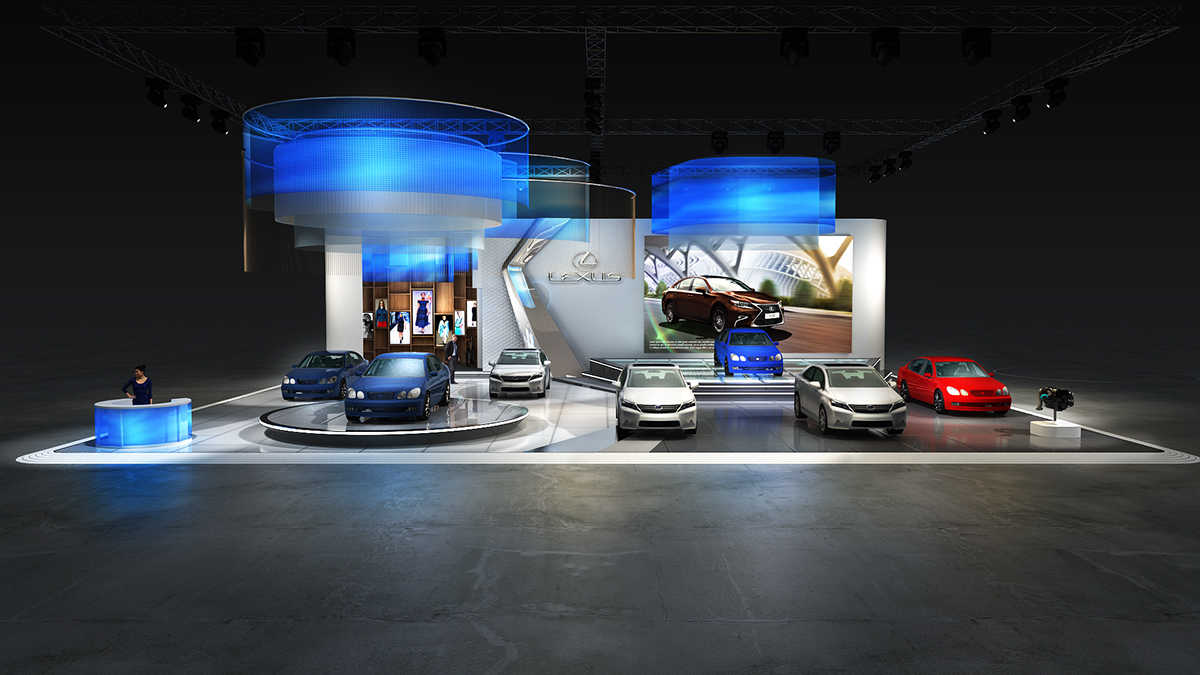

In [1182]:
from IPython.display import Image, display
display(Image(filename='car 3e9d9d51611011.58f47d54bdbee.jpg'))


### 1. Project Introduction:
      As part of this module-end project, the focus is on aiding a Chinese automobile company in its strategic expansion into the US market by analyzing factors influencing car pricing. In collaboration with an automobile consulting firm, the company seeks to understand the dynamics of the American car market, which significantly differ from the Chinese market. Using a comprehensive dataset of various car types in the US, the project aims to identify the significant variables that impact car prices and develop regression models to predict pricing effectively.
By implementing five regression algorithms—Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor—the project will provide insights into pricing dynamics, enabling the management to optimize design and business strategies for competitive advantage.


### 2.Goal of the Project
The primary aim of this project is to help a Chinese automobile company understand the pricing dynamics of the American car market as they enter this new territory. By analyzing a dataset of cars and identifying the significant variables influencing prices, the project seeks to develop predictive models. These models will assist the company in making informed decisions about car design, manufacturing strategies, and business practices to compete effectively with established US and European automobile brands.
Ultimately, the insights gained from this project will enable the company to strategize better and optimize their market positioning for a successful expansion into the US market.

### 3.Data Story/Source
About dataset

Source of the data is from
link :https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link



### Dataset Description
The dataset contains 205 rows and 26 columns, indicating there are 205 individual car entries (or observations) with 26 features (or attributes). These features include a mix of categorical and numerical variables, such as car characteristics, performance metrics, and technical specifications. The final column, "price," is the target variable to be predicted, while the other columns act as independent variables.
Key aspects:
         The dataset contains 205 rows and 26 columns, indicating there are 205 individual car entries (or observations) with 26 features (or attributes). These features include a mix of categorical and numerical variables, such as car characteristics, performance metrics, and technical specifications. The final column, "price," is the target variable to be predicted, while the other columns act as independent variables.

## Data Preprocessing

### 1.Importing Libraries

In [1189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### 2. Load the dataset

In [1191]:

# Google Drive link
url = 'https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'

# Send a request to the URL
response = requests.get(url)

# Save the content to a local file (e.g., 'dataset.csv')
with open('dataset.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset
data = pd.read_csv('dataset.csv')



### 3.Understand the data structure

In [1193]:
# Display the first few rows of the dataset
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1194]:
data.shape

(205, 26)

In [1195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1196]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1197]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [1198]:
# Check unique values for 'aspiration'
print("Unique values in 'aspiration':", data['aspiration'].unique())

# Check unique values for 'fueltype'
print("Unique values in 'fueltype':", data['fueltype'].unique())
# Check unique values for 'fuelsystem'
print("Unique values in 'fuelsystem':", data['fuelsystem'].unique())



Unique values in 'aspiration': ['std' 'turbo']
Unique values in 'fueltype': ['gas' 'diesel']
Unique values in 'fuelsystem': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [1199]:
# Dropping the unnecessary columns
data.drop(['car_ID','CarName'],axis=1,inplace=True)

In [1200]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 4.Handle Missing Data

In [1202]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values. As no null values, dropna() not used.

### 5.Handle Duplicates

In [1205]:
data.duplicated().sum()

1

In [1206]:
data.drop_duplicates(inplace=True)

### 6.Handle outliers

In [1208]:
print(data.dtypes)


symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [1209]:
print(data['fuelsystem'].unique())  # To view unique values for columns


['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [1210]:
# # Define binary and multi-category columns
# binary_columns = ['fueltype', 'aspiration']
# multi_category_columns = ['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'enginelocation', 'doornumber', 'fuelsystem']

# # Apply Label Encoding for binary categorical columns
# data['fueltype'] = data['fueltype'].map({'gas': 0, 'diesel': 1})
# data['aspiration'] = data['aspiration'].map({'std': 0, 'turbo': 1})

# # Apply One-Hot Encoding for multi-category columns
# data = pd.get_dummies(data, columns=multi_category_columns, drop_first=True)


In [1211]:
data.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Label encoding transforms binary categorical variables into numerical values, simplifying data representation for models. One-hot encoding converts multi-category variables into separate columns for each unique category, ensuring models process them effectively.


In [1213]:
# # Automatically identify boolean columns in the dataset
# bool_columns = data.select_dtypes(include=['bool']).columns

# # Convert boolean columns to integers (1 for True, 0 for False)
# data[bool_columns] =data[bool_columns].astype(int)

# # Verify the changes
# print("Data types after converting boolean columns:")
# print(data.dtypes)
# print("\nUpdated dataset preview:")
# print(data.head())


In [1214]:

# print(data.skew().sort_values(ascending=True))

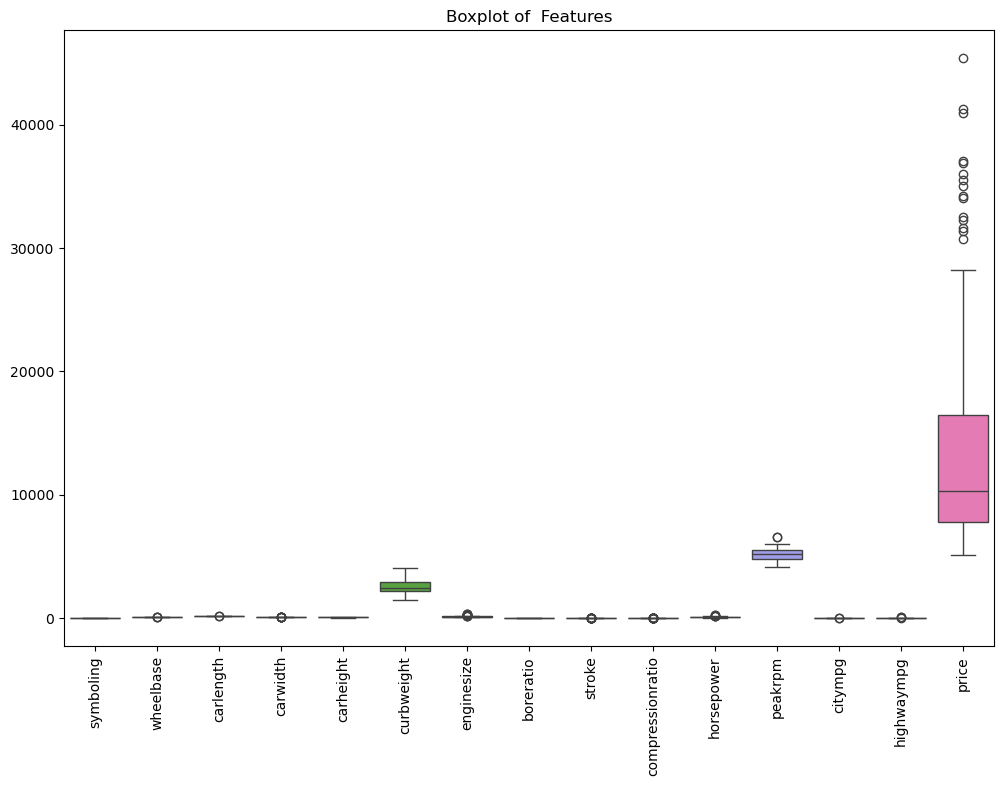

In [1215]:
#boxplot to detect potential outliers in  data
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [1216]:
#IQR method for outlier removal
def remove_outliers(data,columns):
  data_filtered=data.copy()

  for column in columns:
     Q1 = data[column].quantile(0.20)
     Q3 = data[column].quantile(0.80)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered


In [1217]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [1218]:
data.shape

(204, 24)

In [1219]:
columns_to_clean = ['wheelbase', 'carlength','carwidth','stroke','enginesize','compressionratio', 'horsepower','citympg', 'highwaympg']
# Call the f'unction
data_cleaned = remove_outliers(data, columns_to_clean)


In [1220]:
data_cleaned.shape

(174, 24)

Removing the outliers from'fueltype','aspiration','carbody','enginelocation','wheelbase', 'carlength','enginetype', 'cylindernumber','enginesize','stroke', 'compressionratio', 'price', 'horsepower','citympg', 'highwaympg', 'price'] outliers function.

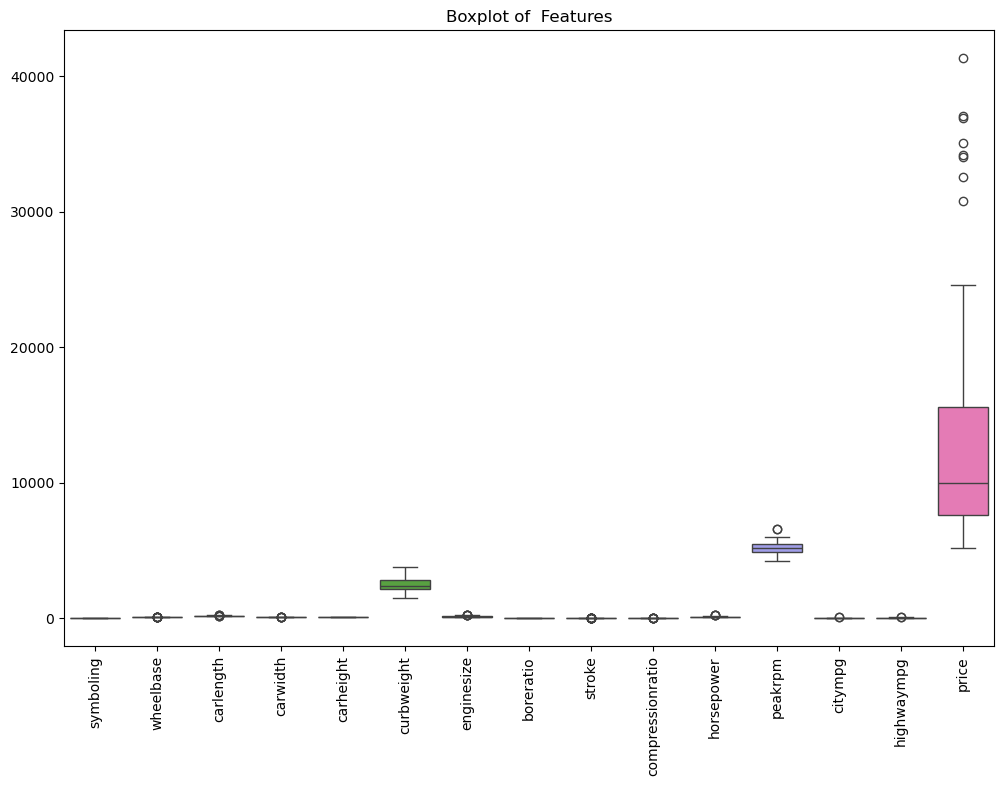

In [1222]:
#boxplot to detect potential outliers in  data after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

Here we can see there are still some outliers presented after outlier removal in some features.

### Code for Outlier Removal (Capping Method)

In [1225]:
import pandas as pd
import numpy as np

# Identify numeric columns in your dataset
numeric_columns = data_cleaned.select_dtypes(include=['number']).columns

# Apply capping method for all numeric columns
for column in numeric_columns:
    print(f"Processing column: {column}")
    
    # Calculate the 10st and 90th percentiles for capping
    lower_cap = data_cleaned[column].quantile(0.10)  # 1st percentile
    upper_cap = data_cleaned[column].quantile(0.90)  # 99th percentile
    
    # Cap the outlier values
    data_cleaned[column] = np.where(data_cleaned[column] < lower_cap, lower_cap, data_cleaned[column])
    data_cleaned[column] = np.where(data_cleaned[column] > upper_cap, upper_cap, data_cleaned[column])

# Verify the transformation
print("Outlier capping completed. Here's the updated dataset preview:")
print(data_cleaned.head())

Processing column: symboling
Processing column: wheelbase
Processing column: carlength
Processing column: carwidth
Processing column: carheight
Processing column: curbweight
Processing column: enginesize
Processing column: boreratio
Processing column: stroke
Processing column: compressionratio
Processing column: horsepower
Processing column: peakrpm
Processing column: citympg
Processing column: highwaympg
Processing column: price
Outlier capping completed. Here's the updated dataset preview:
   symboling fueltype aspiration doornumber      carbody drivewheel  \
0        3.0      gas        std        two  convertible        rwd   
1        3.0      gas        std        two  convertible        rwd   
2        1.0      gas        std        two    hatchback        rwd   
3        2.0      gas        std       four        sedan        fwd   
4        2.0      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsyste

In [1226]:
data_cleaned.shape

(174, 24)

In [1227]:
data.shape

(204, 24)

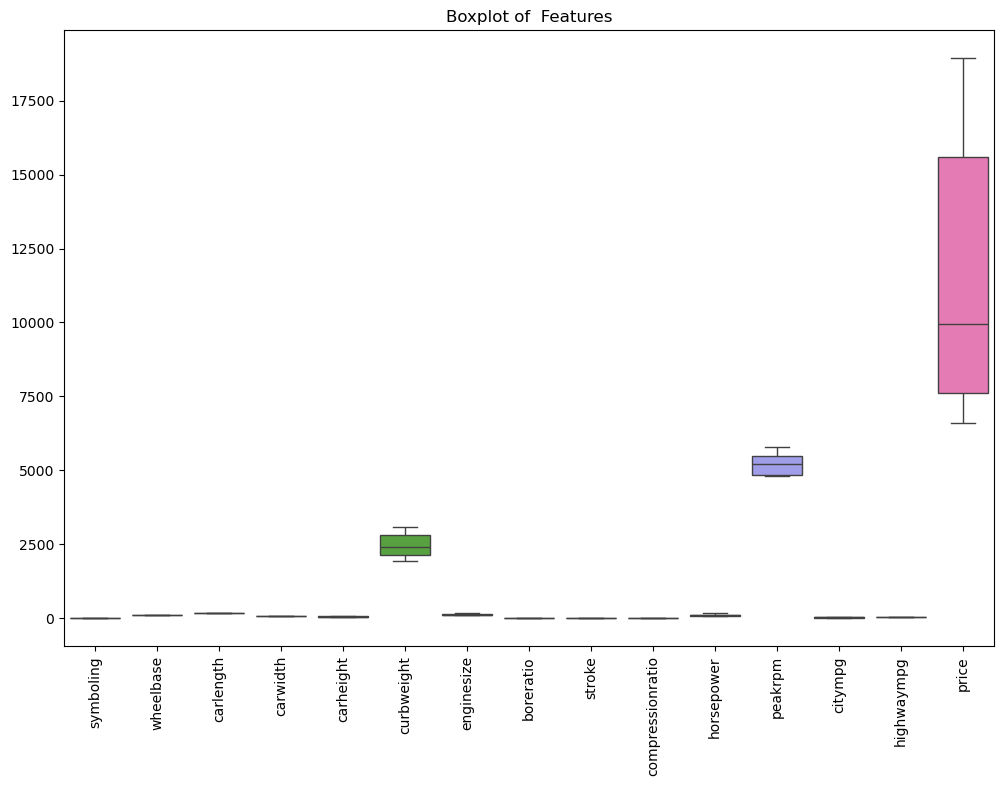

In [1228]:
#boxplot to detect potential outliers in  data after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

outlier removed.

In [1230]:
##Analysis of Skewness:

# Select only numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['number'])

# Calculate skewness for numerical columns
skewness = numerical_columns.skew()

# Display skewness
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
symboling           0.223836
wheelbase           0.730138
carlength           0.088526
carwidth            0.361735
carheight          -0.119869
curbweight          0.238700
enginesize          0.650299
boreratio           0.060227
stroke             -0.343593
compressionratio   -0.879300
horsepower          0.647059
peakrpm             0.209710
citympg            -0.068433
highwaympg          0.075567
price               0.591184
dtype: float64


### Onehot Encoding

In [1232]:
import pandas as pd

# Assume 'data' is your dataset
# Identify categorical columns
categorical_columns =data_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Verify the transformation
print("Data after One-Hot Encoding:")
print(data_encoded.head())


Data after One-Hot Encoding:
   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0        3.0       93.7      168.8      64.1      50.53      2548.0   
1        3.0       93.7      168.8      64.1      50.53      2548.0   
2        1.0       94.5      171.2      65.5      52.40      2823.0   
3        2.0       99.8      176.6      66.2      54.30      2337.0   
4        2.0       99.4      176.6      66.4      54.30      2824.0   

   enginesize  boreratio  stroke  compressionratio  ...  cylindernumber_four  \
0       130.0       3.47    2.90               9.0  ...                 True   
1       130.0       3.47    2.90               9.0  ...                 True   
2       152.0       2.97    3.47               9.0  ...                False   
3       109.0       3.19    3.40               9.5  ...                 True   
4       136.0       3.19    3.40               8.0  ...                False   

   cylindernumber_six  cylindernumber_three  cylindernumber_two

In [1233]:
data_encoded.dtypes

symboling               float64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight              float64
enginesize              float64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower              float64
peakrpm                 float64
citympg                 float64
highwaympg              float64
price                   float64
aspiration_turbo           bool
doornumber_two             bool
carbody_hardtop            bool
carbody_hatchback          bool
carbody_sedan              bool
carbody_wagon              bool
drivewheel_fwd             bool
drivewheel_rwd             bool
enginelocation_rear        bool
enginetype_l               bool
enginetype_ohc             bool
enginetype_ohcf            bool
enginetype_ohcv            bool
enginetype_rotor           bool
cylindernumber_five        bool
cylindernumber_four        bool
cylinder

In [1234]:
# Convert boolean columns to 0 and 1
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Verify the changes
print(data_encoded.dtypes)


symboling               float64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight              float64
enginesize              float64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower              float64
peakrpm                 float64
citympg                 float64
highwaympg              float64
price                   float64
aspiration_turbo          int32
doornumber_two            int32
carbody_hardtop           int32
carbody_hatchback         int32
carbody_sedan             int32
carbody_wagon             int32
drivewheel_fwd            int32
drivewheel_rwd            int32
enginelocation_rear       int32
enginetype_l              int32
enginetype_ohc            int32
enginetype_ohcf           int32
enginetype_ohcv           int32
enginetype_rotor          int32
cylindernumber_five       int32
cylindernumber_four       int32
cylinder

### Feature Relationships:

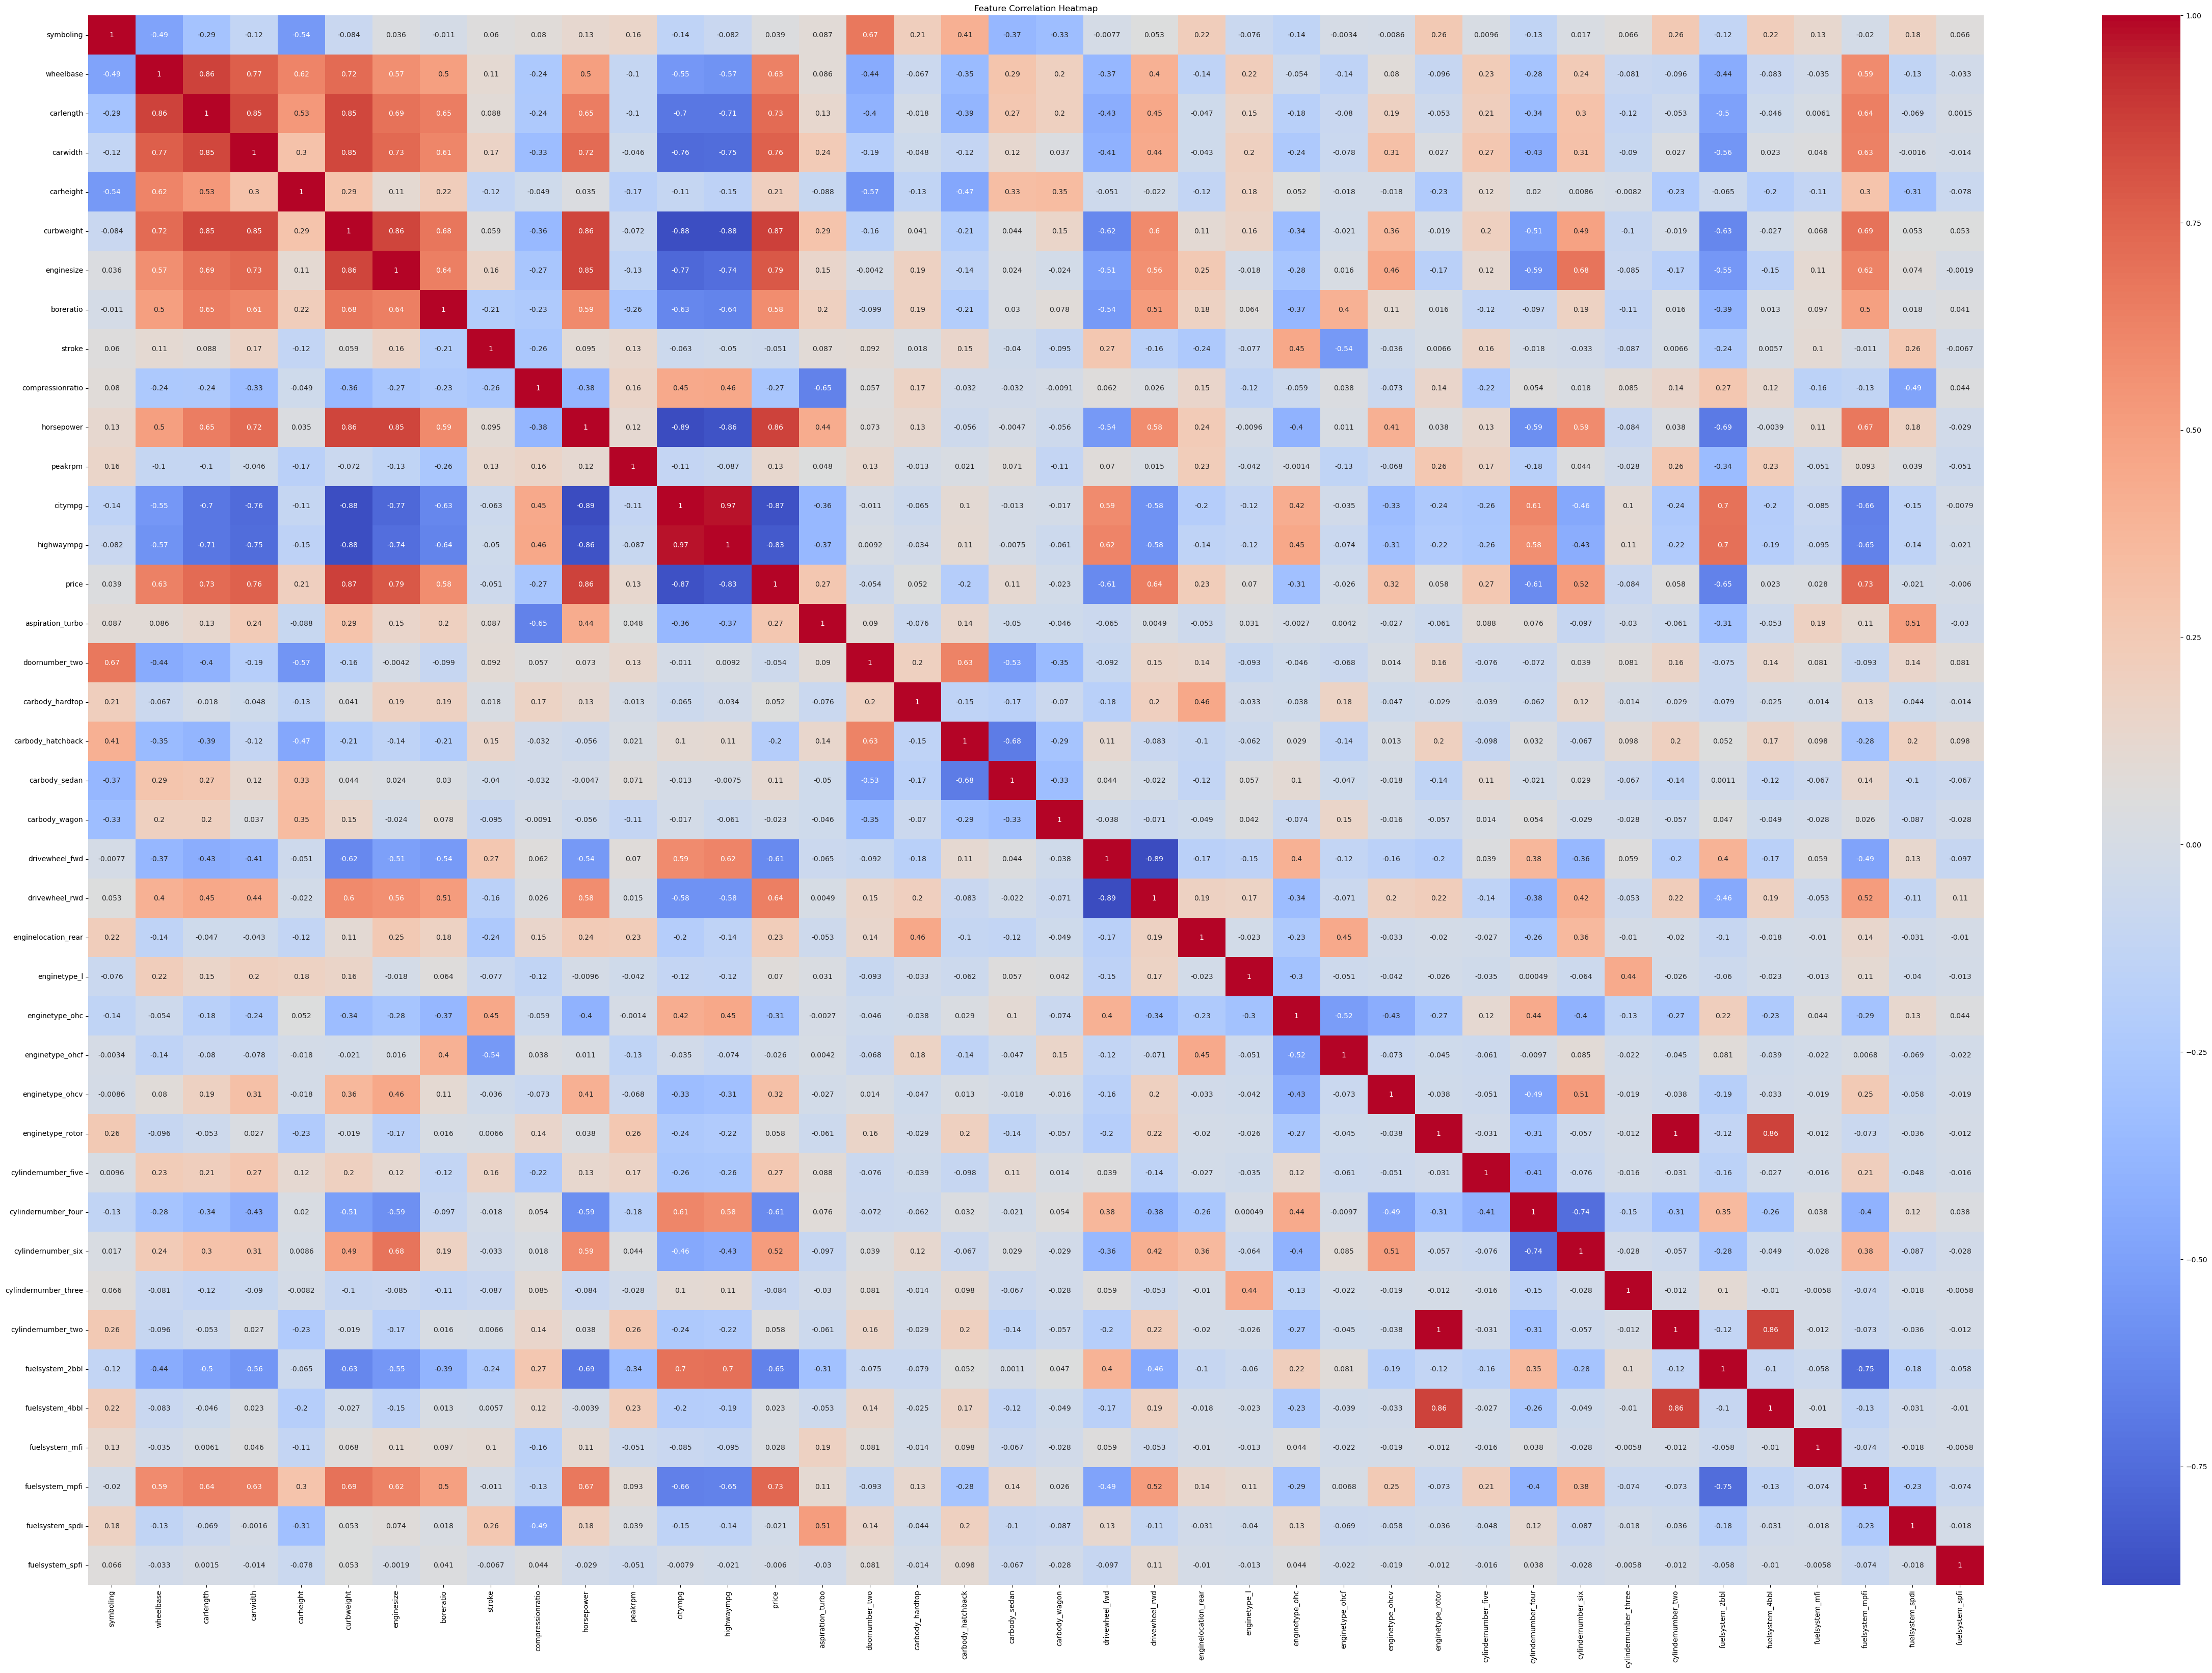

In [1236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
correlation_matrix = data_encoded.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(60, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### Findings
citympg and highwaympg are highly correlated (0.99), which indicates redundancy. Including both in predictive models could lead to multicollinearity, so one of these variables could be dropped or used with regularization techniques.

These insights could guide feature selection, engineering, and understanding of key factors influencing car pricing precting model.

In [1238]:
# Correlation with target variable
print(data_encoded.corr()['price'].sort_values(ascending=False))

price                   1.000000
curbweight              0.869390
horsepower              0.860902
enginesize              0.791480
carwidth                0.758000
fuelsystem_mpfi         0.734407
carlength               0.725313
drivewheel_rwd          0.640263
wheelbase               0.634501
boreratio               0.579833
cylindernumber_six      0.515643
enginetype_ohcv         0.315477
aspiration_turbo        0.273597
cylindernumber_five     0.267935
enginelocation_rear     0.230801
carheight               0.207499
peakrpm                 0.134510
carbody_sedan           0.112905
enginetype_l            0.069646
cylindernumber_two      0.057741
enginetype_rotor        0.057741
carbody_hardtop         0.051502
symboling               0.039239
fuelsystem_mfi          0.027637
fuelsystem_4bbl         0.023119
fuelsystem_spfi        -0.005972
fuelsystem_spdi        -0.021447
carbody_wagon          -0.023387
enginetype_ohcf        -0.025537
stroke                 -0.051252
doornumber

In [1239]:
# Define correlation threshold (e.g., 0.9 for high multicollinearity)
correlation_threshold = 0.9

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Find columns to drop based on high correlation, excluding 'price'
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_name = correlation_matrix.columns[i]  # Drop the later column in the pair
            # Ensure 'price' is not dropped
            if col_name != 'price':
                columns_to_drop.add(col_name)

# Drop the identified columns from the dataset
data_encoded = data_encoded.drop(columns=columns_to_drop)

# Verify the remaining columns
print("Remaining columns after dropping highly correlated ones:")
print(data_encoded.columns)


Remaining columns after dropping highly correlated ones:
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')


In [1240]:
data_encoded.shape

(174, 38)

In [1241]:
new_data=data_encoded

### Data Visualization/insights

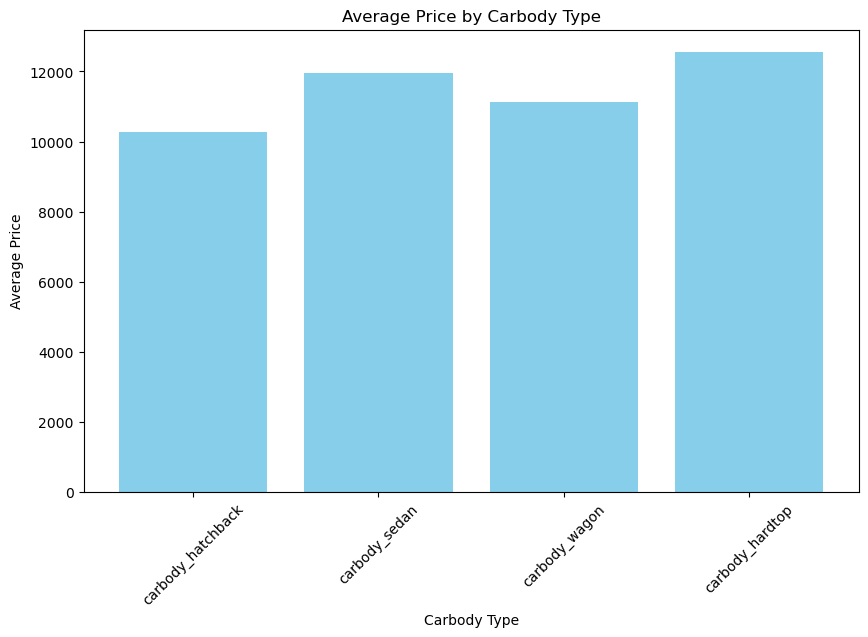

In [1243]:
# Example of calculating average price for each carbody type
carbody_columns = ['carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carbody_hardtop']

# Aggregating price by carbody types
average_price_by_carbody = {}
for column in carbody_columns:
    average_price_by_carbody[column] = new_data.loc[new_data[column] == 1,'price'].mean()

# Plotting the aggregated data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_carbody.keys(), average_price_by_carbody.values(), color='skyblue')
plt.title('Average Price by Carbody Type')
plt.xlabel('Carbody Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


In [1244]:
# Calculate correlation matrix
correlations = new_data.corr()

# Extract correlation with 'price'
price_correlation = correlations['price'].sort_values(ascending=False)

# Separate positive and negative correlations
positive_correlation = price_correlation[price_correlation > 0]
negative_correlation = price_correlation[price_correlation < 0]

print("Positive Correlations with Price:")
print(positive_correlation)

print("\nNegative Correlations with Price:")
print(negative_correlation)


Positive Correlations with Price:
price                  1.000000
curbweight             0.869390
horsepower             0.860902
enginesize             0.791480
carwidth               0.758000
fuelsystem_mpfi        0.734407
carlength              0.725313
drivewheel_rwd         0.640263
wheelbase              0.634501
boreratio              0.579833
cylindernumber_six     0.515643
enginetype_ohcv        0.315477
aspiration_turbo       0.273597
cylindernumber_five    0.267935
enginelocation_rear    0.230801
carheight              0.207499
peakrpm                0.134510
carbody_sedan          0.112905
enginetype_l           0.069646
enginetype_rotor       0.057741
carbody_hardtop        0.051502
symboling              0.039239
fuelsystem_mfi         0.027637
fuelsystem_4bbl        0.023119
Name: price, dtype: float64

Negative Correlations with Price:
fuelsystem_spfi        -0.005972
fuelsystem_spdi        -0.021447
carbody_wagon          -0.023387
enginetype_ohcf        -0.025537
str

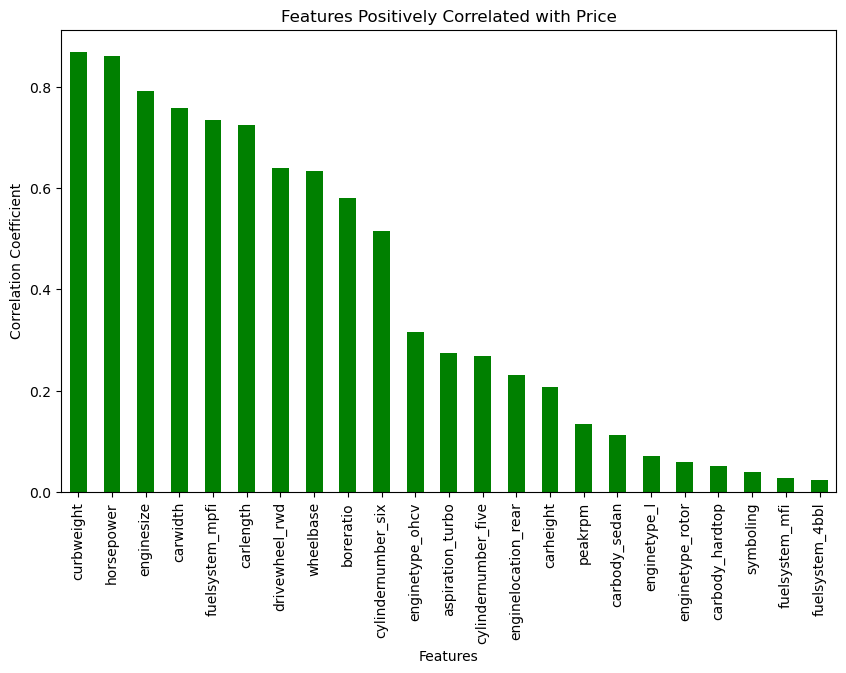

In [1245]:
import matplotlib.pyplot as plt

# Visualize positive correlations
plt.figure(figsize=(10, 6))
positive_correlation.drop('price').plot(kind='bar', color='green')  # Drop 'price' itself from the chart
plt.title('Features Positively Correlated with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


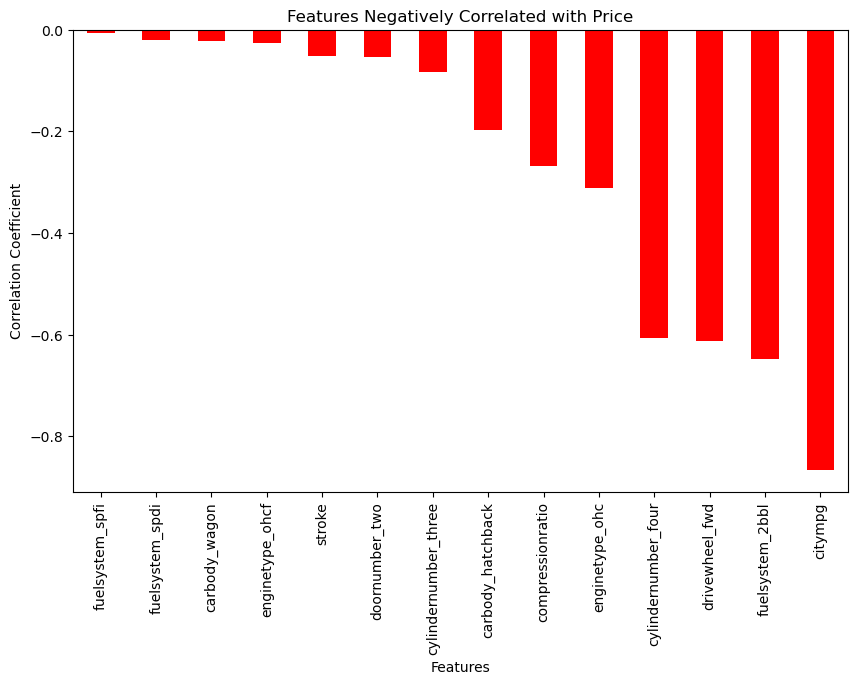

In [1246]:
# Visualize negative correlations
plt.figure(figsize=(10, 6))
negative_correlation.plot(kind='bar', color='red')
plt.title('Features Negatively Correlated with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


In [1247]:
print(len(new_data.columns))

38


In [1248]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Features and target
X = new_data.drop(columns=['price'])
y = new_data['price']

# Apply SelectKBest for feature selection
select_k = SelectKBest(score_func=f_classif, k=25)  # Adjust k as per your requirement
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]  # Get selected feature names
selected_scores = select_k.scores_[select_k.get_support()]  # Get scores of selected features

# Print selected features and scores
print("Selected Features:", selected_features)
print("Feature Scores based on SelectKBest:", selected_scores)

# Create a DataFrame to display feature names and scores
feature_scores_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': selected_scores
})

# Sort by scores in descending order
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print the sorted feature scores
print("Selected Features:\n", feature_scores_df)


Selected Features: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'citympg',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
Feature Scores based on SelectKBest: [ 1.76961313  3.63459304  3.31566934 19.42652169 10.25359281  4.97203388
  2.08064934  1.78473464  9.82449283 34.55028394  2.55505993  1.68979892
  4.26815514  9.91019027  9.24871029  1.88317225         inf  2.21437128
  1.86083058  3.8248581          inf         inf 15.38537424  5.82025523
         inf]
Selected Features:
                 Feature      Score
24      fuelsystem_spfi        inf
21       fuelsystem_mfi        inf
20      fuelsystem_

In [1249]:
print("Number of features in X:", len(X.columns))


Number of features in X: 37


In [1250]:
X = X.select_dtypes(include=['float64', 'int64'])


In [1251]:
new_data.shape

(174, 38)

In [1252]:
print(X.dtypes)  # Verify feature data types


symboling           float64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginesize          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
dtype: object


In [1253]:
print(new_data[['fuelsystem_spfi', 'fuelsystem_mfi', 'fuelsystem_4bbl', 'enginetype_rotor']].describe())


       fuelsystem_spfi  fuelsystem_mfi  fuelsystem_4bbl  enginetype_rotor
count       174.000000      174.000000       174.000000        174.000000
mean          0.005747        0.005747         0.017241          0.022989
std           0.075810        0.075810         0.130545          0.150299
min           0.000000        0.000000         0.000000          0.000000
25%           0.000000        0.000000         0.000000          0.000000
50%           0.000000        0.000000         0.000000          0.000000
75%           0.000000        0.000000         0.000000          0.000000
max           1.000000        1.000000         1.000000          1.000000


### Check Association:


In [1255]:
print(new_data.groupby('fuelsystem_spfi')['price'].mean())
print(new_data.groupby('fuelsystem_mfi')['price'].mean())
print(new_data.groupby('fuelsystem_4bbl')['price'].mean())
print(new_data.groupby('enginetype_rotor')['price'].mean())


fuelsystem_spfi
0    11390.432179
1    11048.000000
Name: price, dtype: float64
fuelsystem_mfi
0    11379.357035
1    12964.000000
Name: price, dtype: float64
fuelsystem_4bbl
0    11375.19162
1    12145.00000
Name: price, dtype: float64
enginetype_rotor
0    11350.0751
1    13020.0000
Name: price, dtype: float64


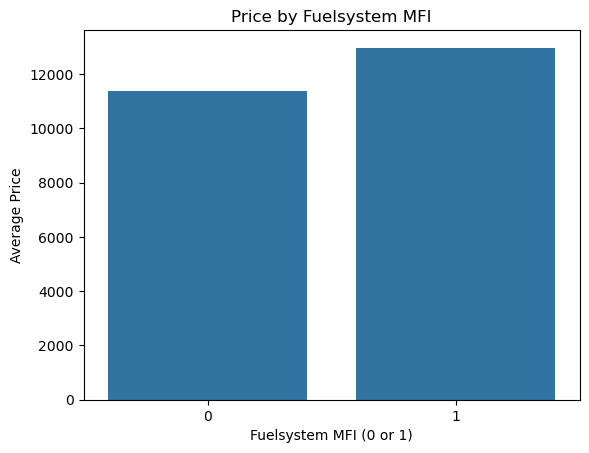

In [1256]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=new_data, x='fuelsystem_mfi', y='price', estimator='mean', ci=None)
plt.title('Price by Fuelsystem MFI')
plt.xlabel('Fuelsystem MFI (0 or 1)')
plt.ylabel('Average Price')
plt.show()


In [1257]:
import pandas as pd

# Step 1: Filter based on SelectKBest scores
selected_features = feature_scores_df[feature_scores_df['Score'] > 2.0]['Feature'].tolist()  # Use a custom threshold (e.g., Score > 2)

# Step 2: Remove multicollinear features based on correlation
correlation_matrix = new_data[selected_features].corr()

correlation_threshold = 0.9
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_name = correlation_matrix.columns[i]  # Drop the later column in the pair
            columns_to_drop.add(col_name)

# Retain only non-redundant features
final_selected_features = [col for col in selected_features if col not in columns_to_drop]

# Step 3: Display the final selected features
print("Final Selected Features:")
print(final_selected_features)


Final Selected Features:
['fuelsystem_spfi', 'fuelsystem_mfi', 'fuelsystem_4bbl', 'enginetype_rotor', 'citympg', 'curbweight', 'fuelsystem_mpfi', 'enginesize', 'drivewheel_fwd', 'horsepower', 'drivewheel_rwd', 'fuelsystem_spdi', 'boreratio', 'carbody_wagon', 'fuelsystem_2bbl', 'carlength', 'carwidth', 'carbody_hatchback', 'cylindernumber_five', 'stroke']


In [1258]:
selected_columns=['fuelsystem_spfi', 'fuelsystem_mfi', 'fuelsystem_4bbl', 'enginetype_rotor', 'citympg', 'curbweight', 'fuelsystem_mpfi', 'enginesize', 'drivewheel_fwd', 'horsepower', 'drivewheel_rwd', 'fuelsystem_spdi', 'boreratio', 'carbody_wagon', 'fuelsystem_2bbl', 'carlength', 'carwidth', 'carbody_hatchback', 'cylindernumber_five', 'stroke','price']
new_data_2 = new_data[selected_columns]

new_data_2

,fuelsystem_spfi,fuelsystem_mfi,fuelsystem_4bbl,enginetype_rotor,citympg,curbweight,fuelsystem_mpfi,enginesize,drivewheel_fwd,horsepower,...,fuelsystem_spdi,boreratio,carbody_wagon,fuelsystem_2bbl,carlength,carwidth,carbody_hatchback,cylindernumber_five,stroke,price
0,0,0,0,0,21.0,2548.0,1,130.0,0,111.0,...,0,3.47,0,0,168.8,64.1,0,0,2.90,13495.0
1,0,0,0,0,21.0,2548.0,1,130.0,0,111.0,...,0,3.47,0,0,168.8,64.1,0,0,2.90,16500.0
2,0,0,0,0,19.0,2823.0,1,152.0,0,154.0,...,0,2.97,0,0,171.2,65.5,1,0,3.47,16500.0
3,0,0,0,0,24.0,2337.0,1,109.0,1,102.0,...,0,3.19,0,0,176.6,66.2,0,0,3.40,13950.0
4,0,0,0,0,18.0,2824.0,1,136.0,0,115.0,...,0,3.19,0,0,176.6,66.4,0,1,3.40,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,17.0,3068.3,1,130.0,0,158.8,...,0,3.62,1,0,188.8,67.2,0,0,3.15,18941.0
200,0,0,0,0,23.0,2952.0,1,141.0,0,114.0,...,0,3.62,0,0,188.8,67.9,0,0,3.15,16845.0
201,0,0,0,0,19.0,3049.0,1,141.0,0,158.8,...,0,3.62,0,0,188.8,67.9,0,0,3.15,18941.0
202,0,0,0,0,18.0,3012.0,1,168.9,0,134.0,...,0,3.58,0,0,188.8,67.9,0,0,2.90,18941.0


In [1259]:
# Count the number of features after feature selection
print("Number of features selected:", len(final_selected_features))


Number of features selected: 20


### Split Data into Training and Testing Sets



In [1261]:
 # define the features (X) and target (y)

from sklearn.model_selection import train_test_split

X = new_data_2.drop('price',axis=1)
y = new_data_2['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(139, 20) (35, 20) (139,) (35,)


In [1262]:
X_train

,fuelsystem_spfi,fuelsystem_mfi,fuelsystem_4bbl,enginetype_rotor,citympg,curbweight,fuelsystem_mpfi,enginesize,drivewheel_fwd,horsepower,drivewheel_rwd,fuelsystem_spdi,boreratio,carbody_wagon,fuelsystem_2bbl,carlength,carwidth,carbody_hatchback,cylindernumber_five,stroke
141,0,0,0,0,31.0,2145.0,0,108.0,1,82.0,0,0,3.62,0,1,172.0,65.4,0,0,2.90
167,0,0,0,0,24.0,2540.0,1,146.0,0,116.0,1,0,3.62,0,0,176.2,65.6,0,0,3.50
193,0,0,0,0,25.0,2563.0,1,109.0,1,88.0,0,0,3.19,1,0,183.1,66.9,0,0,3.40
38,0,0,0,0,27.0,2289.0,0,110.0,1,86.0,0,0,3.15,0,0,167.5,65.2,1,0,3.50
164,0,0,0,0,29.0,2204.0,0,98.0,0,70.0,1,0,3.19,0,1,168.7,64.0,1,0,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,0,0,0,19.0,2833.0,0,156.0,1,145.0,0,1,3.58,0,0,173.2,66.3,1,0,3.50
126,0,0,0,0,17.0,2756.0,1,168.9,0,158.8,1,0,3.62,0,0,168.9,65.0,0,0,2.90
14,0,0,0,0,20.0,3055.0,1,164.0,0,121.0,1,0,3.31,0,0,188.8,66.9,0,0,3.19
104,0,0,0,0,19.0,3068.3,1,168.9,0,158.8,1,0,3.43,0,0,170.7,67.9,1,0,3.27


In [1263]:
X_test

,fuelsystem_spfi,fuelsystem_mfi,fuelsystem_4bbl,enginetype_rotor,citympg,curbweight,fuelsystem_mpfi,enginesize,drivewheel_fwd,horsepower,drivewheel_rwd,fuelsystem_spdi,boreratio,carbody_wagon,fuelsystem_2bbl,carlength,carwidth,carbody_hatchback,cylindernumber_five,stroke
181,0,0,0,0,19.0,3068.3,1,161.0,0,156.0,1,0,3.27,1,0,187.8,66.5,0,0,3.350
169,0,0,0,0,24.0,2551.0,1,146.0,0,116.0,1,0,3.62,0,0,176.2,65.6,1,0,3.500
121,0,0,0,0,31.0,1989.0,0,91.0,1,68.0,0,0,2.97,0,1,167.3,63.8,0,0,3.230
150,0,0,0,0,31.0,1985.0,0,92.0,1,68.0,0,0,3.05,0,1,158.7,63.8,1,0,3.030
165,0,0,0,0,26.0,2265.0,1,98.0,0,112.0,1,0,3.24,0,0,168.7,64.0,0,0,3.080
163,0,0,0,0,29.0,2169.0,0,98.0,0,70.0,1,0,3.19,0,1,168.7,64.0,0,0,3.030
42,0,0,0,0,25.0,2293.0,0,110.0,1,100.0,0,0,3.15,0,1,169.1,66.0,0,0,3.500
15,0,0,0,0,17.0,3068.3,1,168.9,0,158.8,1,0,3.62,0,0,188.8,66.9,0,0,3.390
149,0,0,0,0,23.0,2650.0,1,108.0,0,111.0,0,0,3.62,1,0,173.6,65.4,0,0,2.900
76,0,0,0,0,31.0,1938.6,0,92.0,1,68.0,0,0,2.97,0,1,157.3,64.4,1,0,3.230


In [1264]:
y_train

141     7126.0
167     8449.0
193    12290.0
38      9095.0
164     8238.0
        ...   
82     12629.0
126    18941.0
14     18941.0
104    17199.0
122     7609.0
Name: price, Length: 139, dtype: float64

In [1265]:
y_test

181    15750.000
169     9989.000
121     6692.000
150     6597.200
165     9298.000
163     8058.000
42     10345.000
15     18941.000
149    11694.000
76      6597.200
133    12170.000
64     11245.000
45      8916.500
54      7395.000
31      6855.000
9      17859.167
135    15510.000
58     15645.000
24      6597.200
180    15690.000
162     9258.000
196    15985.000
151     6597.200
29     12964.000
59      8845.000
41     12945.000
130     9295.000
19      6597.200
16     18941.000
89      6597.200
30      6597.200
18      6597.200
12     18941.000
77      6597.200
140     7603.000
Name: price, dtype: float64

### Feature Scaling

Scaling your features is important and at the same time optional. Depends on your work and dataset avoid this step by trial and error if you find lots of missing data if you have done outlier removal and skewness correction before.

Do feature scaling preferably for train data (X_train & Y_train)



In [1267]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale X_train (fit and transform) - Scaling is learned from X_train
X_train_scaled = scaler.fit_transform(X_train)

# Scale X_test (transform only) - Use the same scaler learned from X_train
X_test_scaled = scaler.transform(X_test)

# Now both X_train_scaled and X_test_scaled are scaled consistently


In [1268]:
X_train_scaled#scaled

array([[-0.08512565,  0.        , -0.14852213, ..., -0.73786479,
        -0.2123977 , -1.80822686],
       [-0.08512565,  0.        , -0.14852213, ..., -0.73786479,
        -0.2123977 ,  1.29957572],
       [-0.08512565,  0.        , -0.14852213, ..., -0.73786479,
        -0.2123977 ,  0.78160862],
       ...,
       [-0.08512565,  0.        , -0.14852213, ..., -0.73786479,
        -0.2123977 , -0.30612228],
       [-0.08512565,  0.        , -0.14852213, ...,  1.35526185,
        -0.2123977 ,  0.1082514 ],
       [-0.08512565,  0.        , -0.14852213, ..., -0.73786479,
        -0.2123977 , -0.09893544]])

In [1269]:

print(len(X_train_scaled[0]))

20


In [1270]:
X_train.shape

(139, 20)

In [1271]:
from sklearn.preprocessing import StandardScaler

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

In [1272]:
y_train_scaled

array([[-1.01631759e+00],
       [-7.12356673e-01],
       [ 1.70117915e-01],
       [-5.63937359e-01],
       [-7.60834189e-01],
       [ 2.79020012e-01],
       [-1.12131392e+00],
       [ 1.40594994e+00],
       [ 1.13737072e+00],
       [ 1.51646030e+00],
       [ 1.04407898e-02],
       [-5.97710794e-01],
       [-7.72092000e-01],
       [ 1.69819354e+00],
       [-9.05347731e-01],
       [-1.49695838e-01],
       [ 6.54663322e-01],
       [ 1.62444339e+00],
       [-3.65432271e-01],
       [-9.77489627e-01],
       [-8.15744740e-01],
       [-1.13781006e+00],
       [-4.38952674e-01],
       [ 2.04580604e-01],
       [-8.86967630e-01],
       [ 1.14081699e+00],
       [ 1.23501500e+00],
       [ 1.16723838e+00],
       [-5.21663127e-01],
       [ 1.41536974e+00],
       [-6.87313786e-01],
       [-9.76570622e-01],
       [ 1.35563441e+00],
       [-1.13781006e+00],
       [ 1.69819354e+00],
       [-3.65202520e-01],
       [ 4.28588082e-01],
       [ 1.12128813e+00],
       [ 1.2

# Model training using Linear regression

In [1274]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1275]:
model = LinearRegression()

In [1276]:
# Train the model using the dataset
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [1277]:
# Predict values using the model
Y_pred = model.predict(X_test)

In [1278]:
# Evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, Y_pred))
print("R^2 Score:", r2_score(y_test, Y_pred))

Mean Squared Error (MSE): 119577202.79917456
R^2 Score: -5.777003584337945


In [1279]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
  # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    return mse, r2
    # Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    mse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {"MSE": mse, "R²": r2}
    print("-" * 50)

# Display results for all models
import pandas as pd
results_df = pd.DataFrame(results).T
print("Model Performance Summary:")
print(results_df)



Evaluating Linear Regression...
Mean Squared Error (MSE): 1989697.1077599027
R² Score: 0.8872344885531243
--------------------------------------------------
Evaluating Decision Tree Regressor...
Mean Squared Error (MSE): 3972636.4731968283
R² Score: 0.7748519702092211
--------------------------------------------------
Evaluating Random Forest Regressor...
Mean Squared Error (MSE): 1074538.4105204549
R² Score: 0.9391008445662004
--------------------------------------------------
Evaluating Gradient Boosting Regressor...
Mean Squared Error (MSE): 1003637.6887805145
R² Score: 0.9431191225833797
--------------------------------------------------
Evaluating Support Vector Regressor...
Mean Squared Error (MSE): 18085278.133943964
R² Score: -0.024977937837603825
--------------------------------------------------
Model Performance Summary:
                                      MSE        R²
Linear Regression            1.989697e+06  0.887234
Decision Tree Regressor      3.972636e+06  0.774852


### Model Performance Analysis

The evaluation of five regression models revealed notable differences in their performance on the dataset. Gradient Boosting Regressor emerged as the best-performing model, achieving the lowest Mean Squared Error (MSE) of 1,003,637.69 and the highest R² score of 0.9431, indicating its strong ability to capture both linear and non-linear patterns. Similarly, the Random Forest Regressor also performed exceptionally well, with an MSE of 1,074,538.41 and an R² score of 0.9391, showing robust accuracy and potential for further tuning. While Linear Regression demonstrated a decent performance with an R² score of 0.8872, it struggled with a higher MSE of 1,989,697.10, reflecting its limitations in handling complex relationships. The Decision Tree Regressor showed moderate results (MSE: 3,972,636.47, R²: 0.7748) but was likely prone to overfitting. However, the Support Vector Regressor underperformed significantly, with a negative R² score (-0.0250) and an exceedingly high MSE of 18,085,278.13, suggesting it was not well-suited to the dataset or required further parameter tuning. Overall, Gradient Boosting and Random Forest emerged as the most reliable models for predictive accuracy.

In [1370]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define a custom scorer for Mean Squared Error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize the model you want to cross-validate (e.g., Random Forest Regressor)
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(
    model, X_train_scaled, y_train, cv=5, scoring=mse_scorer  # 5-fold cross-validation
)

# Convert negative MSE to positive for interpretability
cv_scores = -cv_scores

# Print the results
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", cv_scores.mean())
print("Standard Deviation of MSE:", cv_scores.std())


Cross-Validation MSE Scores: [3257140.06433813 2153847.3565948  3350841.06722266 2691872.77862353
 1702518.74531487]
Mean MSE: 2631244.0024187975
Standard Deviation of MSE: 633037.096090159


### Hyperparameter Tuning Code:

In [1373]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the models and parameter grids
param_grids = {
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Random Forest Regressor": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Gradient Boosting Regressor": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0]
        }
    }
}

# Hyperparameter tuning using GridSearchCV
best_models = {}
for model_name, config in param_grids.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        scoring="neg_mean_squared_error",  # Use MSE for regression
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,
        verbose=2
    )
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = {
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_  # Best negative MSE
    }

# Display the best parameters and scores for each model
for model_name, result in best_models.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Negative MSE: {result['best_score']}\n")


Tuning Decision Tree Regressor...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuning Random Forest Regressor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tuning Gradient Boosting Regressor...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Decision Tree Regressor:
  Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Best Negative MSE: -4330549.848489418

Random Forest Regressor:
  Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
  Best Negative MSE: -2607337.3699346436

Gradient Boosting Regressor:
  Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
  Best Negative MSE: -2622324.1100583267



## Summary of Findings:


### .The Random Forest Regressor achieved the lowest negative MSE, making it the best-performing model for this dataset.
### .The Gradient Boosting Regressor also performed well and is worth considering if further fine-tuning is required.
### .The Decision Tree Regressor, while interpretable, underperformed due to its sensitivity to overfitting.


### ___________    END________________